Para k ['100', '2', '1e-05']
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1 100_2_1e-05
Para k ['1', '2', '1e-05']
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1 1_2_1e-05
Para k ['1000', '2', '1e-05']
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1 1000_2_1e-05
Para k ['10', '2', '1e-05']
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1 10_2_1e-05
Para k ['2000', '2', '1e-05']
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1 2000_2_1e-05
Para k ['500', '2', '1e-05']
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1 500_2_1e-05


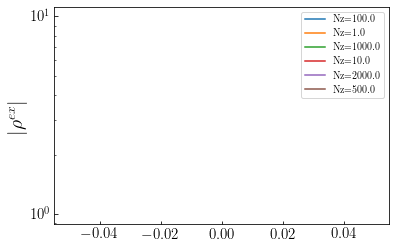

SystemExit: 

/hetghome/jordan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
#plot angle beams
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
#import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    """if 'fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2' not in h:
        continue"""
    if 'sajm' not in h:
        #print('flat conti')
        continue
    if 'NN' not in h:
        #print('n1 conti')
        continue
    """if 'N1_As_'  not in h:
        #print('pb conti')
        continue"""
    if 'yvymys' not in h:
        #print('pb conti')
        continue
    """if 'nnm'  not in h:
        #print('inm conti')
        continue
    if 'vdp' not in h:
        continue"""
    
    if '_mu_' in h:
        #print(h)
        if 'pb' in h:
            pb=h[h.find('pb')+2:]
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        if 'nnm' in h:
            mo='+'
        elif 'inm' in h:
            mo='-'
        else:
            mo=''
        if 'vip' in h:
            vp='_vip_'
        if 'vdp' in h:
            vp='_vdp_'
        """if 'rapv' not in h:
            if 'rap' in h:
                rp='rap'
            else:
                rp=''
        else:
            rp='rapv'"""
        if 'od2' in h:
            od='od2'
        else:
            od=''
        for i in os.listdir(path+'/'+h):
            #print(i[i.find('COSEnu/')+7:])
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                #print(Para,'para')
                
                
                #####################################################################
                cc=0
                for k in os.listdir(path+'/'+h):
                    if os.path.isfile(path+'/'+h+'/'+k):
                        continue
                    confn = path+'/'+h+'/'+k+'/job.config'
                    f=open(confn,'r')
                    for line in f.readlines():
                        if "dz" in line:
                            dz=float(line[line.find(":")+1:])
                    Para = k.split("_")
                    Nz = float(Para[0])
                    Nvz = float(Para[1])
                    CFL = float(Para[2])
                    if CFL!=10**-5:
                        continue
                    print('Para k',Para)
                    if 'jpg' in k:
                        continue
                    if Nz==0:
                        print('nz 0')
                    else:
                        """if Nz==1:
                            Nz = float(Para[0])"""
                        if Nz != float(Para[0]):
                            #print(Nz,'pre Nz')
                            #print(float(Para[0]))
                            #print(' not same')
                            #Nz = float(Para[0])
                            continue   
                        else:
                            #print(Nz,'pre Nz')
                            #print(float(Para[0]))
                            #print('same')
                            trash=1
                    #print(i)
                    #dira = 
                    
                    if os.path.isdir(path+'/'+h+'/'+k):
                        Nz = float(Para[0])
                        Nvz = float(Para[1])
                        CFL = float(Para[2])
                        #print(path+'/'+h+'/'+k)
                        #print(k)
                        pign = path+'/'+h+'/fig_'+k+'_each_off_compare.jpg'
                        """if os.path.exists(pign):
                            print('pig exit conti')"""
                            #continue
                        #print(path+'/'+h+'/'+i)
                        #print(i,'i')
                        #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                        #print(DATA)
                        Time = []
                        AOp= [[],[],[],[]]
                        AOpb = []
                        AOn= []
                        AOnb = []
                        for l in os.listdir(path+'/'+h+'/'+k):
                            if 'dat' in l:
                                if '_rho' in l:
                                    #print(l)
                                    fn = path+'/'+h+'/'+k+'/'+l
                                    itr=float(l[l.find("_rho_")+5:l.find(".dat")])
                                    DATA = pd.read_csv(fn, sep='\t',names=["Z", "vz", "rho_ee", "rho_xx", "Re[rho_ex]", "Im[rho_ex]", "brho_ee", "brho_xx", "Re[brho_ex]", "Im[brho_ex]"])
                                    DATA["sqr"]=DATA["Re[rho_ex]"] * DATA["Re[rho_ex]"] + DATA["Im[rho_ex]"] * DATA["Im[rho_ex]"] 
                                    DATA["sqrb"]=DATA["Re[brho_ex]"] * DATA["Re[brho_ex]"] + DATA["Im[brho_ex]"] * DATA["Im[brho_ex]"]
                                    #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                                    #ave_off=(DATA["sqr"].mean())**0.5
                                    #print(DATA)
                                    AVE = []
                                    for m in range(int(Nvz)):
                                        #print(m,'m')
                                        AVE.append((DATA.loc[m,"sqr"])**0.5)
                                        """if m%2 ==1:
                                            AOp[2].append((DATA.loc[m,"sqr"])**0.5)#+np.sin(itr * CFL*dz*100)*((DATA.loc[m,"sqr"])**0.5*0.01))
                                            AOp[3].append((DATA.loc[m,"sqrb"])**0.5)
                                        if m%2 ==0:
                                            AOp[0].append((DATA.loc[m,"sqr"])**0.5)
                                            AOp[1].append((DATA.loc[m,"sqrb"])**0.5)"""
                                    AOp[0].append(np.average(AVE))
                                    #print(ave_off)
                                    Time.append(itr * CFL*dz)
                                    #AOp.append(ave_off)
                                    #sys.exit()
                                    """DATA = DATA.drop(index=0)
                                    toflo = {'time':float}
                                    DATA = DATA.astype(toflo)"""
                        sTime = sorted(Time)
                        sTimeid=sorted(range(len(Time)), key=lambda l: Time[l])
                        #print(len(AOp[2]),'AOp[2]')
                        #print(len(sTimeid),'sTimeid')
                        print(h,k)
                        lab = [r'$|\rho^{ex}_{v_{-}}|$',r'$|\bar{\rho}^{ex}_{v_{-}}|$',r'$|\rho^{ex}_{v_{+}}|$',r'$|\bar{\rho}^{ex}_{v_{+}}|$']
                        sAOp= [[],[],[],[]]
                        #plt.plot(sTime,sAOp[0],label='Nvz='+str(Nvz),c='C'+str(cc))
                        #
                        #for l in range(len(AOp)):
                        #l=0
                        for m in sTimeid:
                            #print(l,m)
                            sAOp[0].append((AOp[0])[m])
                        plt.plot(sTime,sAOp[0],label='Nz='+str(Nz),c='C'+str(cc))
                        cc+=1
                        """if l<2:
                            plt.plot(sTime,sAOp[l],linestyle='dashed',linewidth=2.5,label=lab[l],c='C'+str(l))
                        else:
                            plt.plot(sTime,sAOp[l],label=lab[l],c='C'+str(l))"""
                        """plt.scatter(Time,AOpb,s=0.7,label=,c='C'+str(1))
                        plt.scatter(Time,AOn,s=0.7,label=,c='C'+str(2))
                        plt.scatter(Time,AOnb,s=0.7,label=,c='C'+str(3))"""
                plt.ylabel(r'$|\rho^{ex}|$')
                plt.yscale('log')
                #plt.xlim(150,151)
                #plt.ylim(0.005,0.01)
                plt.legend()
                #plt.show()
                
                
                #plt.savefig(pign)
                plt.show()
                plt.close('all')
                #continue
                sys.exit()
                ####################################################################
                """if CFL !=10**-5:
                    continue"""
                #print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/'+i+'_survival_probability.jpg'
                if os.path.exists(pign):
                    print('pig exit conti')
                    #continue
                #print(path+'/'+h+'/'+i)
                #print(i,'i')
                #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                #print(DATA)
                fn = path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat'
                if os.path.isfile(fn)==False:
                    print(fn)
                    print('no csv conti')
                    continue
                print(h)
                print(i)

                DATA = pd.read_csv(fn, sep='\t',names=["time","Pee","Pbee"])
                #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                DATA = DATA.drop(index=0)
                toflo = {'time':float}
                DATA = DATA.astype(toflo)
                #pd.to_numeric(DATA["time"])
                """for j in DATA["time"]:
                    print(j)
                    print(type(j))"""
                DATA["physical time"]=DATA["time"].multiply(CFL*dz)
                #plt.title("dz,dt")
                #print(DATA.head(),'DATA head')
                #print(DATA.columns,'DATA[[0]]')
                #print(DATA)
                if 'pb' in h:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+' [Nz,-$log_{10}$'+r'$\epsilon]$='+str(int(Nz))+', '+pb)
                else:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+r' [Nvz]='+str(Nvz))
                #cc+=1
                #plt.show()
                #sys.exit()
                #DATA.plot(x="time",y="Pbee")#
                """if 'tur' in h:
                    plt.title("Averaged survival probability (tur) "+i)
                if 'non' in h:
                    plt.title("Averaged survival probability (w/o tur) "+i)"""
                plt.yscale('log')
                plt.show()
                #DATA.plot()
                #plt.savefig(pign)
                plt.close('all')
                #plt.show()
                #plt.plot()